In [72]:
%cd /content/drive/MyDrive/Colab Notebooks/Rain

/content/drive/MyDrive/Colab Notebooks/Rain


In [73]:
import pandas as pd

df = pd.read_csv('weatherAUS.csv')

print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [74]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [75]:
column_headers = list(df.columns.values)
column_headers

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load the dataset
df = pd.read_csv('weatherAUS.csv')

# Select subset of numerical variables
numerical_vars = [
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
]

df_subset_tomorrow = df[numerical_vars + ['RainTomorrow']].dropna()
rain_tomorrow_column = df_subset_tomorrow.pop('RainTomorrow')

df_subset_tomorrow.shape


(58090, 16)

In [77]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaled_data = preprocessing.scale(df_subset_tomorrow)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [78]:
scaled_data

array([[ 0.70519602,  1.58725077, -0.30286383, ...,  0.25364792,
         1.28902056,  1.57553908],
       [ 0.7824926 ,  0.68384502, -0.30286383, ..., -1.25556112,
         0.33515441,  0.63919534],
       [ 0.93708575,  1.93140534, -0.30286383, ...,  0.63095019,
         1.60697595,  1.79499464],
       ...,
       [ 1.13805686,  1.2430962 , -0.30286383, ..., -1.63286338,
         1.01648738,  1.38534425],
       [ 0.95254507,  1.09969846, -0.30286383, ..., -1.25556112,
         1.01648738,  0.9610635 ],
       [ 1.06076028,  1.08535869, -0.30286383, ...,  0.25364792,
         1.10733177,  1.22441017]])

In [79]:
pca_data

array([[ 4.67328111, -0.30654714, -0.17880522, ..., -0.01283412,
        -0.15757183, -0.09121092],
       [ 3.70448911, -1.76742167,  0.82668249, ..., -0.16365047,
        -0.19986301,  0.07486839],
       [ 4.24702484,  0.07210466,  0.13995642, ...,  0.24363616,
         0.04691519,  0.08916726],
       ...,
       [ 3.11874615, -1.79520548, -0.7264144 , ..., -0.0966236 ,
        -0.08130311, -0.00672481],
       [ 2.07621923, -0.93112066, -1.52350098, ..., -0.18144607,
        -0.09418703,  0.06386992],
       [ 1.84851549,  0.00851696, -1.98479731, ...,  0.15915704,
         0.28917668,  0.05426015]])

In [80]:
print(np.round(pca.explained_variance_ratio_* 100, decimals=1))

[34.8 21.3 13.3  6.4  5.6  4.6  3.   2.6  2.4  1.9  1.6  1.3  0.6  0.2
  0.2  0.1]


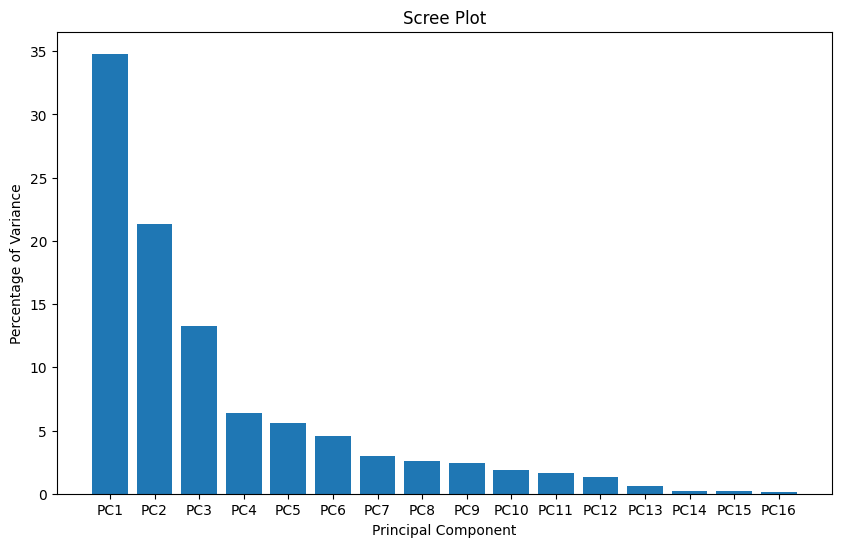

In [81]:
import numpy as np

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

plt.savefig('Scree.png', dpi=300, bbox_inches='tight')
plt.show()

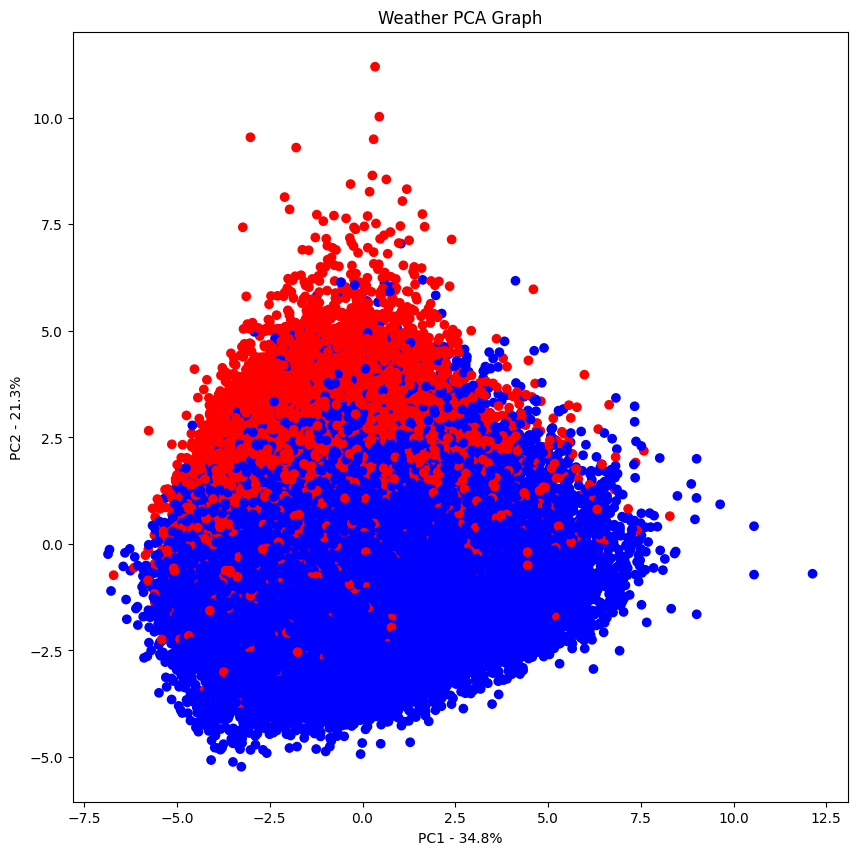

In [82]:
pca_df = pd.DataFrame(pca_data, index=rain_tomorrow_column.T, columns=labels)

colors = rain_tomorrow_column.map({'No': 'blue', 'Yes': 'red'})

plt.figure(figsize=(10, 10))
plt.scatter(pca_df.PC1, pca_df.PC2, c=colors)
plt.title('Weather PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.savefig('PCA.png', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
RainTomorrow,,,,,,,,,,,,,,,,
No,4.673281,-0.306547,-0.178805,0.636374,-1.484706,1.224128,-0.913145,-0.321393,0.972168,-0.327808,-0.238167,0.418974,-0.191036,-0.012834,-0.157572,-0.091211
No,3.704489,-1.767422,0.826682,0.062045,-0.338459,1.163193,0.228578,1.257394,0.284323,-0.286828,-0.441976,-0.356176,-0.833075,-0.163650,-0.199863,0.074868
No,4.247025,0.072105,0.139956,-0.825584,-0.320936,0.999401,1.199860,-0.732034,0.053092,1.067412,-0.243580,-0.092979,0.155448,0.243636,0.046915,0.089167
No,4.286629,-1.205805,-2.198758,0.037594,-0.825240,1.057500,0.184285,-0.347761,0.735904,0.340803,-0.116993,0.398697,-0.244344,-0.041138,-0.055919,0.078908
No,5.265609,-0.164523,-1.365789,-0.837399,-0.913738,1.397271,0.612786,-1.174170,0.599113,-0.212255,-0.058027,-0.446062,-0.183063,0.150536,-0.045229,0.141109


In [84]:
loading_scores = pd.Series(pca.components_[0], index=numerical_vars)

sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

print(loading_scores[sorted_loading_scores.index.values])

MaxTemp          0.388427
Temp3pm          0.384845
Temp9am          0.360941
Evaporation      0.323270
MinTemp          0.294654
Humidity9am     -0.288534
Sunshine         0.248536
Pressure3pm     -0.237927
Humidity3pm     -0.233296
Pressure9am     -0.206218
Cloud9am        -0.160474
Cloud3pm        -0.158052
WindGustSpeed    0.108411
WindSpeed3pm     0.090882
WindSpeed9am     0.089319
Rainfall        -0.045924
dtype: float64


In [85]:
loading_scores = pd.Series(pca.components_[1], index=numerical_vars)

sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

print(loading_scores[sorted_loading_scores.index.values])

Pressure9am     -0.358503
Cloud9am         0.358105
Cloud3pm         0.357357
Sunshine        -0.327877
Pressure3pm     -0.318877
Humidity3pm      0.311606
WindGustSpeed    0.270971
MinTemp          0.241044
Rainfall         0.225083
WindSpeed3pm     0.223037
WindSpeed9am     0.180589
Humidity9am      0.164398
Temp9am          0.129742
Temp3pm         -0.027379
Evaporation      0.009520
MaxTemp         -0.000171
dtype: float64
